I used the following resources for help with building the random forest models:

http://www.agcross.com/2015/02/random-forests-in-python-with-scikit-learn/ 
https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier as RFC

In [2]:
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
X = training_data.values[:,1:]
y = training_data.values[:,0]

In [4]:
#splitting the training dataset from kaggle into train/test to try out different settings  
training_data['is_train'] = np.random.uniform(0, 1, len(training_data)) <= .75
train, test = training_data[training_data['is_train']==True], training_data[training_data['is_train']==False]

In [6]:
train.shape

(31489, 786)

In [6]:
forest = RFC()
forest.fit(train.values[:,1:],train['label'])

In [34]:
forest.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
predictions = forest.predict(test.values[:,1:])
pd.crosstab(index=test['label'], columns=predictions, rownames=['actual'], colnames=['predictions'])

predictions,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,1014,0,3,2,3,1,6,0,10,2
1,0,1152,6,3,0,1,2,2,5,1
2,10,3,943,10,8,6,10,6,7,0
3,4,8,28,984,1,26,3,7,10,6
4,2,6,4,1,968,2,7,3,5,27
5,13,2,5,30,5,872,9,1,9,8
6,8,2,6,2,4,16,969,0,3,1
7,4,3,20,4,14,0,0,1052,5,16
8,4,8,17,35,11,22,12,2,919,15


In [33]:
forest.score(test.values[:,1:],test['label'])

0.9356251785544234

In [35]:
forest2 = RFC(criterion='entropy')
forest2.fit(train.values[:,1:],train['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
forest2.score(test.values[:,1:],test['label'])

0.93648223978668699

In [37]:
predictions2 = forest2.predict(test.values[:,1:])
pd.crosstab(index=test['label'], columns=predictions2, rownames=['actual'], colnames=['predictions'])

predictions,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,1011,0,4,4,2,2,10,0,8,0
1,0,1152,4,5,1,1,1,2,6,0
2,5,5,954,8,6,3,2,13,5,2
3,1,4,32,992,0,20,2,10,10,6
4,4,7,6,1,961,1,5,4,7,29
5,16,1,4,34,2,871,10,0,10,6
6,11,1,6,2,8,15,963,0,4,1
7,3,3,20,4,8,2,0,1059,5,14
8,6,13,12,23,21,20,6,2,929,13


In [43]:
forest3 = RFC(min_samples_leaf=10)

In [55]:
#checking different min_samples_leaf values for gini criterion
scores_gini = np.empty(10)
for i in range(1,11):
    min_leaf_tests = RFC(min_samples_leaf = i,criterion='gini')
    min_leaf_tests.fit(train.values[:,1:],train['label'])
    scores[i-1] = min_leaf_tests.score(test.values[:,1:],test['label'])

In [59]:
##checking different min_samples_leaf values for entropy criterion
scores_entropy = np.empty(10)
for i in range(1,11):
    min_leaf_tests = RFC(min_samples_leaf = i,criterion='entropy')
    min_leaf_tests.fit(train.values[:,1:],train['label'])
    scores_entropy[i-1] = min_leaf_tests.score(test.values[:,1:],test['label'])

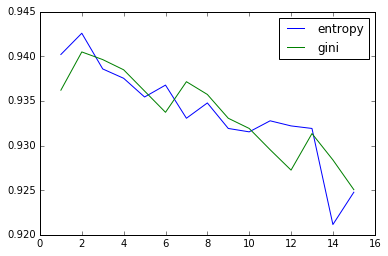

In [67]:
plt.plot(range(1,11),scores_entropy,label='entropy')
plt.plot(range(1,11),scores,label='gini')
plt.legend()

In [44]:
forest3.fit(train.values[:,1:],train['label'])
forest3.score(test.values[:,1:],test['label'])

0.92962574992857827

In [ ]:
predictions3 = forest3.predict(test.values[:,1:])
pd.crosstab(index=test['label'], columns=predictions3, rownames=['actual'], colnames=['predictions'])